# Data Analyst Nanodegree Project 1: Investigate an IMDB Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> In this project, I analyzed the IMDB movie dataset provided by Kaggle ans answer key questions that I devised to explore the dataset further.

> **Questions to Ask:**
1. Who are the 10 most popular directors and who is the most popular director out of all?
2. Who are the 10 highest grossing directors and who is the highest grossing director out of all?
3. Is the number of movies released increase by year?
4. What features are positively correlated with revenue?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [37]:
movie_df = pd.read_csv('tmdb-movies.csv')
movie_df.head(3)

id    imdb_id  popularity     budget     revenue      original_title  \
0  135397  tt0369610   32.985763  150000000  1513528810      Jurassic World   
1   76341  tt1392190   28.419936  150000000   378436354  Mad Max: Fury Road   
2  262500  tt2908446   13.112507  110000000   295238201           Insurgent   

                                                cast  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...   

                                         homepage          director  \
0                   http://www.jurassicworld.com/   Colin Trevorrow   
1                     http://www.madmaxmovie.com/     George Miller   
2  http://www.thedivergentseries.movie/#insurgent  Robert Schwentke   

                      tagline  ...  \
0           The park is open.  ...   
1          What a Lovely Day.  ...   
2  One Choice Can Destroy You  ...   

                                            overview runtime  \
0  Twenty-two years after the events of Jurassic ...     124   
1  An apocalyptic story set in the furthest reach...     120   
2  Beatrice Prior must confront her inner demons ...     119   

                                      genres  \
0  Action|Adventure|Science Fiction|Thriller   
1  Action|Adventure|Science Fiction|Thriller   
2         Adventure|Science Fiction|Thriller   

                                production_companies release_date vote_count  \
0  Universal Studios|Amblin Entertainment|Legenda...       6/9/15       5562   
1  Village Roadshow Pictures|Kennedy Miller Produ...      5/13/15       6185   
2  Summit Entertainment|Mandeville Films|Red Wago...      3/18/15       2480   

   vote_average  release_year    budget_adj   revenue_adj  
0           6.5          2015  1.379999e+08  1.392446e+09  
1           7.1          2015  1.379999e+08  3.481613e+08  
2           6.3          2015  1.012000e+08  2.716190e+08  

[3 rows x 21 columns]

In [38]:
print('There are {} movies and {} features for every movie.'.format(movie_df.shape[0], movie_df.shape[1]))

There are 10866 movies and 21 features for every movie.


> **Conclusions**: 
From the statistics shown above, we can see that there is an outlier(or maybe more) in the popularity columns, since the maximum value is tremendously larger than the other values. A possible solution is to drop this/these data sample(s).

### Dropping irrelavant columns from movie_df

> I decided to drop various columns that will not help my analysis (such as to explore the correlation between features).

In [39]:
movie_df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [40]:
movie_df.drop(['id','imdb_id','homepage','overview', 'keywords', 'tagline', 'runtime', 'budget', 'revenue'], axis=1, inplace=True)

In [41]:
movie_df.head(3)

popularity      original_title  \
0   32.985763      Jurassic World   
1   28.419936  Mad Max: Fury Road   
2   13.112507           Insurgent   

                                                cast          director  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   Colin Trevorrow   
1  Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...     George Miller   
2  Shailene Woodley|Theo James|Kate Winslet|Ansel...  Robert Schwentke   

                                      genres  \
0  Action|Adventure|Science Fiction|Thriller   
1  Action|Adventure|Science Fiction|Thriller   
2         Adventure|Science Fiction|Thriller   

                                production_companies release_date  vote_count  \
0  Universal Studios|Amblin Entertainment|Legenda...       6/9/15        5562   
1  Village Roadshow Pictures|Kennedy Miller Produ...      5/13/15        6185   
2  Summit Entertainment|Mandeville Films|Red Wago...      3/18/15        2480   

   vote_average  release_year    budget_adj   revenue_adj  
0           6.5          2015  1.379999e+08  1.392446e+09  
1           7.1          2015  1.379999e+08  3.481613e+08  
2           6.3          2015  1.012000e+08  2.716190e+08

In [42]:
movie_df.describe()

popularity    vote_count  vote_average  release_year    budget_adj  \
count  10866.000000  10866.000000  10866.000000  10866.000000  1.086600e+04   
mean       0.646441    217.389748      5.974922   2001.322658  1.755104e+07   
std        1.000185    575.619058      0.935142     12.812941  3.430616e+07   
min        0.000065     10.000000      1.500000   1960.000000  0.000000e+00   
25%        0.207583     17.000000      5.400000   1995.000000  0.000000e+00   
50%        0.383856     38.000000      6.000000   2006.000000  0.000000e+00   
75%        0.713817    145.750000      6.600000   2011.000000  2.085325e+07   
max       32.985763   9767.000000      9.200000   2015.000000  4.250000e+08   

        revenue_adj  
count  1.086600e+04  
mean   5.136436e+07  
std    1.446325e+08  
min    0.000000e+00  
25%    0.000000e+00  
50%    0.000000e+00  
75%    3.369710e+07  
max    2.827124e+09

### Dropping inappropriately recorded samples

> **Conclusions:** As we can see from executing the pandas describe command, all of the movies below the median line for both budget and revenue appear to be 0. This would have some issues when I attempt to answer questions related to the budget and revenue such as finding the correlation between the two and searching for top 10 of the directors who had earned the most.  

> Therefore, I decided to drop all the rows with 0 revenue and budget since I can't really fill in the values with median or mean (because each movie has an unique value budget and revenue and filling them with values would screw up the dataset), and there are just far too many incorrectly recorded samples. I then saved it as a new dataframe to answer some of my questions that require budget and revenue to be recorded. 

In [43]:
print('There are {} movies before dropping.'.format(movie_df.shape[0]))

There are 10866 movies before dropping.


In [44]:
movie_df_filtered = movie_df[(movie_df['budget_adj']!=0) & (movie_df['revenue_adj']!=0)]

In [45]:
print('There are now {} movies in this new dataframe where I dropped rows with 0 budget and revenue.'.format(movie_df_filtered.shape[0]))

There are now 3855 movies in this new dataframe where I dropped rows with 0 budget and revenue.


### Exploring Data Types

In [46]:
movie_df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3855 entries, 0 to 10848
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   popularity            3855 non-null   float64
 1   original_title        3855 non-null   object 
 2   cast                  3851 non-null   object 
 3   director              3854 non-null   object 
 4   genres                3855 non-null   object 
 5   production_companies  3809 non-null   object 
 6   release_date          3855 non-null   object 
 7   vote_count            3855 non-null   int64  
 8   vote_average          3855 non-null   float64
 9   release_year          3855 non-null   int64  
 10  budget_adj            3855 non-null   float64
 11  revenue_adj           3855 non-null   float64
dtypes: float64(4), int64(2), object(6)
memory usage: 391.5+ KB


> **Conclusions:** This data frame looks good except for some revisions to be made:
1. There is one movie with missing director. I can easily look it up and fill it in manually. **(Completed)**
2. There are 46 movies with missing production_companies and I will drop them because it would be labor-intensive to fill them in one-by-one.
3. I will convert release_date to a pandas datetime datatype because data manipulations will be easier with datetime datatype (such as to groupby or do a countplot by year)

In [47]:
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   popularity            10866 non-null  float64
 1   original_title        10866 non-null  object 
 2   cast                  10790 non-null  object 
 3   director              10822 non-null  object 
 4   genres                10843 non-null  object 
 5   production_companies  9836 non-null   object 
 6   release_date          10866 non-null  object 
 7   vote_count            10866 non-null  int64  
 8   vote_average          10866 non-null  float64
 9   release_year          10866 non-null  int64  
 10  budget_adj            10866 non-null  float64
 11  revenue_adj           10866 non-null  float64
dtypes: float64(4), int64(2), object(6)
memory usage: 1018.8+ KB


> **Conclusions:** There appear to be several missing rows for various columns. The following revisions will be made:
1. To convert the release_date to datetype datatype for easier data manipulations.
2. To drop columns with missing values, which are 'cast', 'director', 'genres' and 'production_companies'.

### Converting release_date to datetime

In [48]:
movie_df['release_date'] = pd.to_datetime(movie_df['release_date'])
movie_df_filtered['release_date'] = pd.to_datetime(movie_df_filtered['release_date'])

/Users/mingjue/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


### Dealing with null values
I will first deal with **movie_df_filtered** and then **movie_df**, saving the best for the last :) 
> After a little Google search, I found that the director for the movie *Kismat Konnection* is **Aziz Mirza**.

In [49]:
null_data = movie_df_filtered[movie_df_filtered.isnull().any(axis=1)]
null_data.query('director.isnull()')

popularity     original_title  \
3276    0.147657  Kismat Konnection   

                                                   cast director  \
3276  Shahid Kapoor|Vidya Balan|Juhi Chawla|Om Puri|...      NaN   

                            genres production_companies release_date  \
3276  Drama|Comedy|Romance|Foreign      Tips Industries   2008-07-18   

      vote_count  vote_average  release_year    budget_adj   revenue_adj  
3276          11           5.8          2008  4.233448e+06  1.114065e+07

In [50]:
movie_df_filtered['director'][3276] = 'Aziz Mizra'

/Users/mingjue/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/Users/mingjue/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3331: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)


> Next, I proceed to drop rows with missing production companies and cast for **movie_df_filtered**.

In [51]:
movie_df_filtered.dropna(inplace=True)
movie_df_filtered.reset_index(drop=True, inplace=True)

/Users/mingjue/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [52]:
# sanity check
movie_df_filtered[movie_df_filtered.isnull().any(axis=1)]

Empty DataFrame
Columns: [popularity, original_title, cast, director, genres, production_companies, release_date, vote_count, vote_average, release_year, budget_adj, revenue_adj]
Index: []

In [53]:
# sanity check
movie_df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3807 entries, 0 to 3806
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   popularity            3807 non-null   float64       
 1   original_title        3807 non-null   object        
 2   cast                  3807 non-null   object        
 3   director              3807 non-null   object        
 4   genres                3807 non-null   object        
 5   production_companies  3807 non-null   object        
 6   release_date          3807 non-null   datetime64[ns]
 7   vote_count            3807 non-null   int64         
 8   vote_average          3807 non-null   float64       
 9   release_year          3807 non-null   int64         
 10  budget_adj            3807 non-null   float64       
 11  revenue_adj           3807 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(2), object(5)
memory usage: 357.0+ K

> The filtered dataset looks good now, with correct data types and no missing values! I will now deal with the **movie_df** dataset.

In [54]:
movie_df.dropna(inplace=True)
movie_df.reset_index(drop=True, inplace=True)
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9773 entries, 0 to 9772
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   popularity            9773 non-null   float64       
 1   original_title        9773 non-null   object        
 2   cast                  9773 non-null   object        
 3   director              9773 non-null   object        
 4   genres                9773 non-null   object        
 5   production_companies  9773 non-null   object        
 6   release_date          9773 non-null   datetime64[ns]
 7   vote_count            9773 non-null   int64         
 8   vote_average          9773 non-null   float64       
 9   release_year          9773 non-null   int64         
 10  budget_adj            9773 non-null   float64       
 11  revenue_adj           9773 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(2), object(5)
memory usage: 916.3+ K

### Dedupe

> I now proceed to check for duplicated values in both datasets. Awesome, there is only one duplicated data sample.

In [55]:
dupe_1 = movie_df.duplicated()
movie_df[dupe_1]

popularity original_title  \
1892     0.59643         TEKKEN   

                                                   cast          director  \
1892  Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...  Dwight H. Little   

                                           genres    production_companies  \
1892  Crime|Drama|Action|Thriller|Science Fiction  Namco|Light Song Films   

     release_date  vote_count  vote_average  release_year  budget_adj  \
1892   2010-03-20         110           5.0          2010  30000000.0   

      revenue_adj  
1892     967000.0

In [56]:
# double check if the two duplicated rows are identical before dropping
movie_df.query('original_title == "TEKKEN"')

popularity original_title  \
1891     0.59643         TEKKEN   
1892     0.59643         TEKKEN   

                                                   cast          director  \
1891  Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...  Dwight H. Little   
1892  Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...  Dwight H. Little   

                                           genres    production_companies  \
1891  Crime|Drama|Action|Thriller|Science Fiction  Namco|Light Song Films   
1892  Crime|Drama|Action|Thriller|Science Fiction  Namco|Light Song Films   

     release_date  vote_count  vote_average  release_year  budget_adj  \
1891   2010-03-20         110           5.0          2010  30000000.0   
1892   2010-03-20         110           5.0          2010  30000000.0   

      revenue_adj  
1891     967000.0  
1892     967000.0

In [57]:
dupe_2 = movie_df_filtered.duplicated()
movie_df_filtered[dupe_2]

popularity original_title  \
643     0.59643         TEKKEN   

                                                  cast          director  \
643  Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...  Dwight H. Little   

                                          genres    production_companies  \
643  Crime|Drama|Action|Thriller|Science Fiction  Namco|Light Song Films   

    release_date  vote_count  vote_average  release_year  budget_adj  \
643   2010-03-20         110           5.0          2010  30000000.0   

     revenue_adj  
643     967000.0

In [58]:
movie_df_filtered.query('original_title == "TEKKEN"')

popularity original_title  \
642     0.59643         TEKKEN   
643     0.59643         TEKKEN   

                                                  cast          director  \
642  Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...  Dwight H. Little   
643  Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...  Dwight H. Little   

                                          genres    production_companies  \
642  Crime|Drama|Action|Thriller|Science Fiction  Namco|Light Song Films   
643  Crime|Drama|Action|Thriller|Science Fiction  Namco|Light Song Films   

    release_date  vote_count  vote_average  release_year  budget_adj  \
642   2010-03-20         110           5.0          2010  30000000.0   
643   2010-03-20         110           5.0          2010  30000000.0   

     revenue_adj  
642     967000.0  
643     967000.0

In [59]:
movie_df.drop_duplicates(inplace=True)
movie_df_filtered.drop_duplicates(inplace=True)
print('There are now {} and {} duplicated movies in both datasets.'.format(sum(movie_df_filtered.duplicated()), sum(movie_df.duplicated())))

There are now 0 and 0 duplicated movies in both datasets.


/Users/mingjue/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


### Fixing Outliers

In [60]:
movie_df.describe()

popularity   vote_count  vote_average  release_year    budget_adj  \
count  9772.000000  9772.000000   9772.000000   9772.000000  9.772000e+03   
mean      0.694721   239.312014      5.963528   2000.878428  1.941599e+07   
std       1.036931   603.011504      0.913174     13.036794  3.566634e+07   
min       0.000188    10.000000      1.500000   1960.000000  0.000000e+00   
25%       0.232710    18.000000      5.400000   1994.000000  0.000000e+00   
50%       0.419762    46.000000      6.000000   2005.000000  3.061342e+05   
75%       0.776408   173.000000      6.600000   2011.000000  2.464268e+07   
max      32.985763  9767.000000      8.700000   2015.000000  4.250000e+08   

        revenue_adj  
count  9.772000e+03  
mean   5.705309e+07  
std    1.514499e+08  
min    0.000000e+00  
25%    0.000000e+00  
50%    0.000000e+00  
75%    4.311848e+07  
max    2.827124e+09

In [61]:
movie_df_filtered.describe()

popularity   vote_count  vote_average  release_year    budget_adj  \
count  3806.000000  3806.000000   3806.000000   3806.000000  3.806000e+03   
mean      1.203507   534.021545      6.170468   2001.230951  4.470913e+07   
std       1.480473   883.682139      0.792355     11.328658  4.488587e+07   
min       0.010335    10.000000      2.200000   1960.000000  9.693980e-01   
25%       0.470635    74.000000      5.700000   1995.000000  1.354637e+07   
50%       0.810226   208.500000      6.200000   2004.000000  3.038360e+07   
75%       1.387058   584.000000      6.700000   2010.000000  6.083489e+07   
max      32.985763  9767.000000      8.400000   2015.000000  4.250000e+08   

        revenue_adj  
count  3.806000e+03  
mean   1.386824e+08  
std    2.169786e+08  
min    2.370705e+00  
25%    1.923514e+07  
50%    6.283467e+07  
75%    1.657273e+08  
max    2.827124e+09

> In the cells below, when I applied a filter (with an arbitarily chosen value for the popularity column) to see if there are movies with extremely high popularity (since the 75% of the popularity is only about 1.36), I discovered movies with very high popularity (for instance, my favorite movie of all time: Interstellar). I had to admit that many of them are movies that I am very fond of too. I decided not to drop 'Jurassic World' which has the highest popularity out of the entire dataset, because it is possible that this movie was extremely popular and was widely discussed prior to release and during its exhibition, and even now.

In [62]:
movie_df.query('popularity >= 10')

popularity                             original_title  \
0      32.985763                             Jurassic World   
1      28.419936                         Mad Max: Fury Road   
2      13.112507                                  Insurgent   
3      11.173104               Star Wars: The Force Awakens   
558    24.949134                               Interstellar   
559    14.311205                    Guardians of the Galaxy   
560    12.971027        Captain America: The Winter Soldier   
561    11.422751                                  John Wick   
562    10.739009      The Hunger Games: Mockingjay - Part 1   
563    10.174599  The Hobbit: The Battle of the Five Armies   
1193   12.037933                                  Star Wars   

                                                   cast  \
0     Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
1     Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...   
2     Shailene Woodley|Theo James|Kate Winslet|Ansel...   
3     Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...   
558   Matthew McConaughey|Jessica Chastain|Anne Hath...   
559   Chris Pratt|Zoe Saldana|Dave Bautista|Vin Dies...   
560   Chris Evans|Scarlett Johansson|Sebastian Stan|...   
561   Keanu Reeves|Michael Nyqvist|Alfie Allen|Wille...   
562   Jennifer Lawrence|Josh Hutcherson|Liam Hemswor...   
563   Martin Freeman|Ian McKellen|Richard Armitage|K...   
1193  Mark Hamill|Harrison Ford|Carrie Fisher|Peter ...   

                         director                                     genres  \
0                 Colin Trevorrow  Action|Adventure|Science Fiction|Thriller   
1                   George Miller  Action|Adventure|Science Fiction|Thriller   
2                Robert Schwentke         Adventure|Science Fiction|Thriller   
3                     J.J. Abrams   Action|Adventure|Science Fiction|Fantasy   
558             Christopher Nolan            Adventure|Drama|Science Fiction   
559                    James Gunn           Action|Science Fiction|Adventure   
560       Joe Russo|Anthony Russo           Action|Adventure|Science Fiction   
561   Chad Stahelski|David Leitch                            Action|Thriller   
562              Francis Lawrence         Science Fiction|Adventure|Thriller   
563                 Peter Jackson                          Adventure|Fantasy   
1193                 George Lucas           Adventure|Action|Science Fiction   

                                   production_companies release_date  \
0     Universal Studios|Amblin Entertainment|Legenda...   2015-06-09   
1     Village Roadshow Pictures|Kennedy Miller Produ...   2015-05-13   
2     Summit Entertainment|Mandeville Films|Red Wago...   2015-03-18   
3             Lucasfilm|Truenorth Productions|Bad Robot   2015-12-15   
558   Paramount Pictures|Legendary Pictures|Warner B...   2014-11-05   
559   Marvel Studios|Moving Picture Company (MPC)|Bu...   2014-07-30   
560                                      Marvel Studios   2014-03-20   
561   Thunder Road Pictures|Warner Bros.|87Eleven|De...   2014-10-22   
562                               Lionsgate|Color Force   2014-11-18   
563   WingNut Films|New Line Cinema|3Foot7|Metro-Gol...   2014-12-10   
1193   Lucasfilm|Twentieth Century Fox Film Corporation   1977-03-20   

      vote_count  vote_average  release_year    budget_adj   revenue_adj  
0           5562           6.5          2015  1.379999e+08  1.392446e+09  
1           6185           7.1          2015  1.379999e+08  3.481613e+08  
2           2480           6.3          2015  1.012000e+08  2.716190e+08  
3           5292           7.5          2015  1.839999e+08  1.902723e+09  
558         6498           8.0          2014  1.519800e+08  5.726906e+08  
559         5612           7.9          2014  1.565855e+08  7.122911e+08  
560         3848           7.6          2014  1.565855e+08  6.583651e+08  
561         2712           7.0          2014  1.842182e+07  7.252661e+07  
562         3590           6.6         

In [63]:
movie_df_filtered.query('popularity >= 10')

popularity                             original_title  \
0     32.985763                             Jurassic World   
1     28.419936                         Mad Max: Fury Road   
2     13.112507                                  Insurgent   
3     11.173104               Star Wars: The Force Awakens   
160   24.949134                               Interstellar   
161   14.311205                    Guardians of the Galaxy   
162   12.971027        Captain America: The Winter Soldier   
163   11.422751                                  John Wick   
164   10.739009      The Hunger Games: Mockingjay - Part 1   
165   10.174599  The Hobbit: The Battle of the Five Armies   
325   12.037933                                  Star Wars   

                                                  cast  \
0    Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...   
1    Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...   
2    Shailene Woodley|Theo James|Kate Winslet|Ansel...   
3    Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...   
160  Matthew McConaughey|Jessica Chastain|Anne Hath...   
161  Chris Pratt|Zoe Saldana|Dave Bautista|Vin Dies...   
162  Chris Evans|Scarlett Johansson|Sebastian Stan|...   
163  Keanu Reeves|Michael Nyqvist|Alfie Allen|Wille...   
164  Jennifer Lawrence|Josh Hutcherson|Liam Hemswor...   
165  Martin Freeman|Ian McKellen|Richard Armitage|K...   
325  Mark Hamill|Harrison Ford|Carrie Fisher|Peter ...   

                        director                                     genres  \
0                Colin Trevorrow  Action|Adventure|Science Fiction|Thriller   
1                  George Miller  Action|Adventure|Science Fiction|Thriller   
2               Robert Schwentke         Adventure|Science Fiction|Thriller   
3                    J.J. Abrams   Action|Adventure|Science Fiction|Fantasy   
160            Christopher Nolan            Adventure|Drama|Science Fiction   
161                   James Gunn           Action|Science Fiction|Adventure   
162      Joe Russo|Anthony Russo           Action|Adventure|Science Fiction   
163  Chad Stahelski|David Leitch                            Action|Thriller   
164             Francis Lawrence         Science Fiction|Adventure|Thriller   
165                Peter Jackson                          Adventure|Fantasy   
325                 George Lucas           Adventure|Action|Science Fiction   

                                  production_companies release_date  \
0    Universal Studios|Amblin Entertainment|Legenda...   2015-06-09   
1    Village Roadshow Pictures|Kennedy Miller Produ...   2015-05-13   
2    Summit Entertainment|Mandeville Films|Red Wago...   2015-03-18   
3            Lucasfilm|Truenorth Productions|Bad Robot   2015-12-15   
160  Paramount Pictures|Legendary Pictures|Warner B...   2014-11-05   
161  Marvel Studios|Moving Picture Company (MPC)|Bu...   2014-07-30   
162                                     Marvel Studios   2014-03-20   
163  Thunder Road Pictures|Warner Bros.|87Eleven|De...   2014-10-22   
164                              Lionsgate|Color Force   2014-11-18   
165  WingNut Films|New Line Cinema|3Foot7|Metro-Gol...   2014-12-10   
325   Lucasfilm|Twentieth Century Fox Film Corporation   1977-03-20   

     vote_count  vote_average  release_year    budget_adj   revenue_adj  
0          5562           6.5          2015  1.379999e+08  1.392446e+09  
1          6185           7.1          2015  1.379999e+08  3.481613e+08  
2          2480           6.3          2015  1.012000e+08  2.716190e+08  
3          5292           7.5          2015  1.839999e+08  1.902723e+09  
160        6498           8.0          2014  1.519800e+08  5.726906e+08  
161        5612           7.9          2014  1.565855e+08  7.122911e+08  
162        3848           7.6          2014  1.565855e+08  6.583651e+08  
163        2712           7.0          2014  1.842182e+07  7.252661e+07  
164        3590           6.6          2014  1.151364e+08  6.927528e+08  
165        3110      

### Extracting useful features

In [64]:
movie_df.head(1)

popularity  original_title  \
0   32.985763  Jurassic World   

                                                cast         director  \
0  Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...  Colin Trevorrow   

                                      genres  \
0  Action|Adventure|Science Fiction|Thriller   

                                production_companies release_date  vote_count  \
0  Universal Studios|Amblin Entertainment|Legenda...   2015-06-09        5562   

   vote_average  release_year    budget_adj   revenue_adj  
0           6.5          2015  1.379999e+08  1.392446e+09

> **Conclusions:** Separating out different actors/actresses, genres and production companies from the corresponding columns will help me answer the questions I devised earlier better.

>I will first extract features for **movie_df_filtered**, and then for **movie_df**.

In [72]:
m_f_c = (movie_df_filtered['cast'].str.split('|', expand=True).rename(columns=lambda x: f"actor_{x+1}"))
m_f_g = (movie_df_filtered['genres'].str.split('|', expand=True).rename(columns=lambda x: f"genre_{x+1}"))
m_f_p = (movie_df_filtered['production_companies'].str.split('|', expand=True).rename(columns=lambda x: f"production_company_{x+1}"))

# check to see if the split performed is as intended
m_f_p.head(3)

production_company_1        production_company_2  \
0          Universal Studios        Amblin Entertainment   
1  Village Roadshow Pictures  Kennedy Miller Productions   
2       Summit Entertainment            Mandeville Films   

      production_company_3     production_company_4 production_company_5  
0       Legendary Pictures  Fuji Television Network               Dentsu  
1                     None                     None                 None  
2  Red Wagon Entertainment                  NeoReel                 None

In [73]:
m_c = (movie_df['cast'].str.split('|', expand=True).rename(columns=lambda x: f"cast_{x+1}"))
m_g = (movie_df['genres'].str.split('|', expand=True).rename(columns=lambda x: f"genre_{x+1}"))
m_p = (movie_df['production_companies'].str.split('|', expand=True).rename(columns=lambda x: f"production_company_{x+1}"))

# check to see if the split performed is as intended
m_c.head(3)

cast_1               cast_2            cast_3             cast_4  \
0       Chris Pratt  Bryce Dallas Howard       Irrfan Khan  Vincent D'Onofrio   
1         Tom Hardy      Charlize Theron  Hugh Keays-Byrne     Nicholas Hoult   
2  Shailene Woodley           Theo James      Kate Winslet       Ansel Elgort   

          cast_5  
0  Nick Robinson  
1    Josh Helman  
2   Miles Teller

> Lastly, I merged the dataframes with the original dataframes, and dropped the intial corresponding columns.

In [74]:
movie_df = movie_df.join([m_c, m_g, m_p])
movie_df.drop(['cast', 'production_companies', 'genres'], inplace=True, axis=1)
movie_df.dtypes

popularity                     float64
original_title                  object
director                        object
release_date            datetime64[ns]
vote_count                       int64
vote_average                   float64
release_year                     int64
budget_adj                     float64
revenue_adj                    float64
cast_1                          object
cast_2                          object
cast_3                          object
cast_4                          object
cast_5                          object
genre_1                         object
genre_2                         object
genre_3                         object
genre_4                         object
genre_5                         object
production_company_1            object
production_company_2            object
production_company_3            object
production_company_4            object
production_company_5            object
dtype: object

In [75]:
movie_df_filtered = movie_df_filtered.join([m_f_c, m_f_g, m_f_p])
movie_df_filtered.drop(['cast', 'production_companies', 'genres'], inplace=True, axis=1)
movie_df_filtered.dtypes

popularity                     float64
original_title                  object
director                        object
release_date            datetime64[ns]
vote_count                       int64
vote_average                   float64
release_year                     int64
budget_adj                     float64
revenue_adj                    float64
actor_1                         object
actor_2                         object
actor_3                         object
actor_4                         object
actor_5                         object
genre_1                         object
genre_2                         object
genre_3                         object
genre_4                         object
genre_5                         object
production_company_1            object
production_company_2            object
production_company_3            object
production_company_4            object
production_company_5            object
dtype: object

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1: Who are the 10 most popular directors and who is the most popular director out of all?

In [76]:
df_2 = movie_df.groupby('director').sum()
df_2.reset_index(inplace=True)
df_2.sort_values('popularity', ascending=False, inplace=True)
df_3 = df_2.head(11)

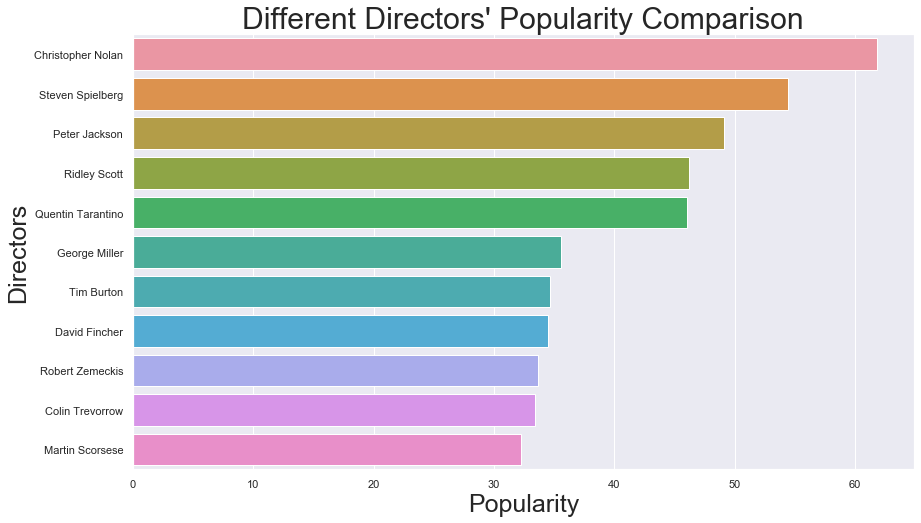

In [77]:
sns.set(rc={'figure.figsize':(14,8)})

sns.barplot(y='director', 
            x='popularity',
            data=df_3,
            hue_order='popularity')

plt.xlabel('Popularity', fontsize=25)
plt.ylabel('Directors', fontsize=25)
plt.title("Different Directors' Popularity Comparison", fontsize=30)
plt.show()

> **Conclusions:** As we can see, Christopher Nolan is considered the most popular director. And this is true, because Interstellar is the best movie of all time.

### Research Question 2: Who are the 10 highest grossing directors and who is the highest grossing director out of all?
> Although Nolan is the most popular director, is he neccessarily the highest grossing director?

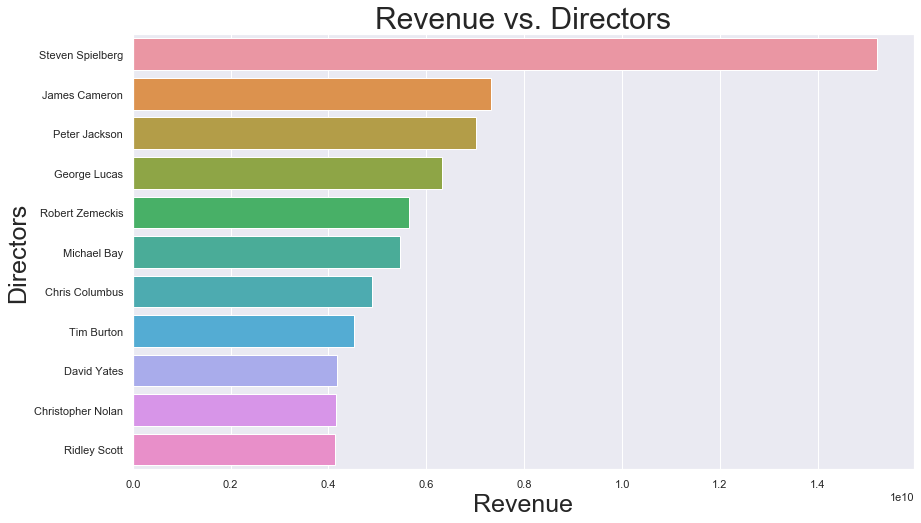

In [209]:
df_11 = movie_df_filtered.groupby('director').sum()
df_11.reset_index(inplace=True)
df_11.sort_values('revenue_adj', ascending=False, inplace=True)
df_12 = df_11.head(11)

sns.set(rc={'figure.figsize':(14,8)})

sns.barplot(y='director', 
            x='revenue_adj',
            data=df_12,
            hue_order='revenue_adj')

plt.xlabel('Revenue', fontsize=25)
plt.ylabel('Directors', fontsize=25)
plt.title("Revenue vs. Directors", fontsize=30)
plt.show()

> **Conclusions:** It turns out Spielberg is the highest grossing director, not Nolan who ranked 9th on the list.

### Research Question 3:  Is the number of movies released increase by year?

In [171]:
df_4 = movie_df.groupby(movie_df.release_date.dt.year).count()

In [172]:
df_4.tail(11)['release_date']

release_date
2015    558
2060     32
2061     30
2062     30
2063     34
2064     41
2065     34
2066     44
2067     36
2068     37
2069     29
Name: release_date, dtype: int64

> While I group **movie_df** by the release_date, some movies show up having release year in the future. Not sure why this occur so I decided to select only movies released in and prior to 2015.

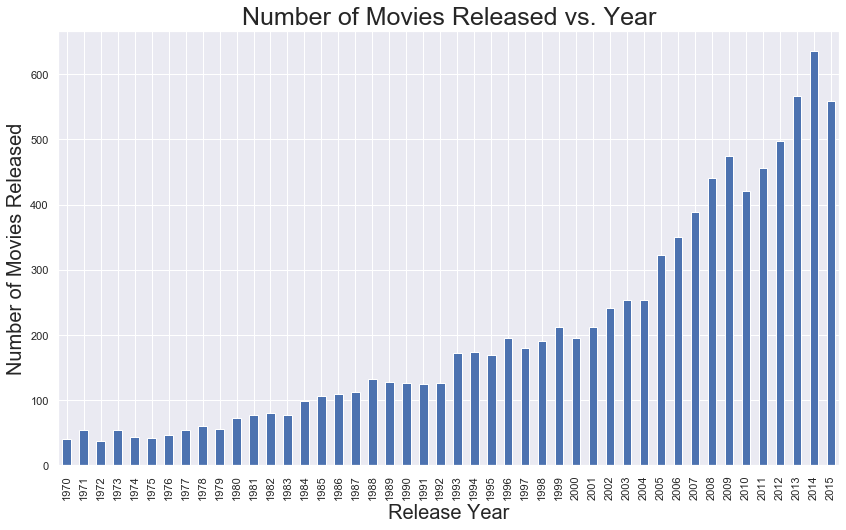

In [188]:
df_5 = df_4.head(46)
df_5['release_date'].plot(kind='bar')

plt.xlabel('Release Year', fontsize=20)
plt.ylabel('Number of Movies Released', fontsize=20)
plt.title('Number of Movies Released vs. Year', fontsize=25)
plt.show()

> **Conclusions:** It seems that there is a trend such that more movies are released as time goes on.

### Research Question 4: What features are positively correlated with revenue?

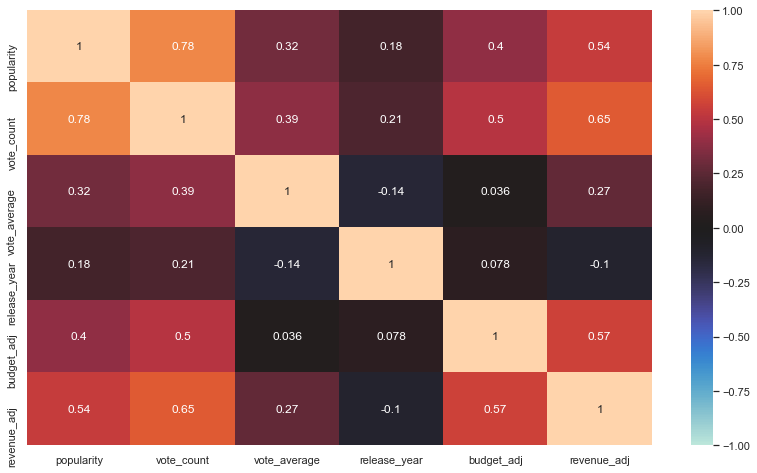

In [189]:
sns.heatmap(movie_df_filtered.corr(), annot=True, fmt='.2g', 
            vmin=-1, vmax=1, center=0, )

> **Conclusions:** From the heatmap shown above, budget, vote_count, vote_average and popularity are positvely correlated with revenue. Let's evaluate them further by plotting their relationships individually.

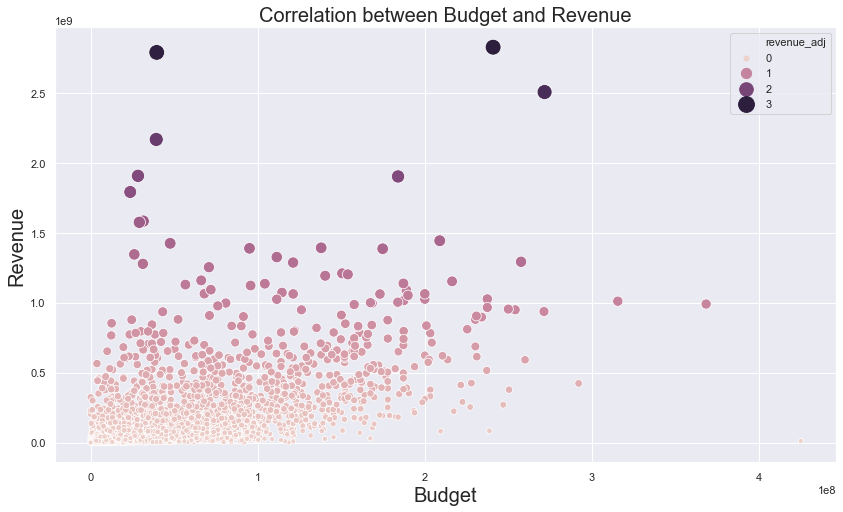

In [201]:
# sns.set(rc={'figure.figsize':(20,12)})

sns.scatterplot(x='budget_adj', 
                y='revenue_adj',
                data=movie_df_filtered,
                size='revenue_adj',
                hue='revenue_adj',
                sizes=(25, 250))

plt.xlabel('Budget', fontsize=20)
plt.ylabel('Revenue', fontsize=20)
plt.title('Correlation between Budget and Revenue', fontsize=20)
plt.show()

> **Conclusions:** There doesn't seem to be a correlation between budget and revenue.

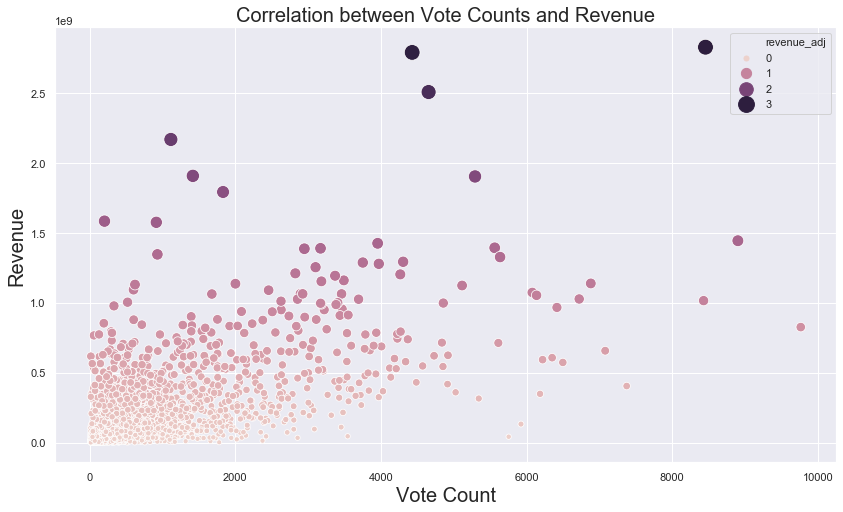

In [210]:
sns.scatterplot(x='vote_count', 
                y='revenue_adj',
                data=movie_df_filtered,
                size='revenue_adj',
                hue='revenue_adj',
                sizes=(25, 250))

plt.xlabel('Vote Count', fontsize=20)
plt.ylabel('Revenue', fontsize=20)
plt.title('Correlation between Vote Counts and Revenue', fontsize=20)
plt.show()

> **Conclusions:** No pattern is observed to indicate a correlation between vote count and revenue.

In [206]:
sns.scatterplot(x='vote_average', 
                y='revenue_adj',
                data=movie_df_filtered,
                size='revenue_adj',
                hue='revenue_adj',
                sizes=(30, 300))

plt.xlabel('Average Voting Score', fontsize=20)
plt.ylabel('Revenue', fontsize=20)
plt.title('Correlation between Average Voting Score and Revenue', fontsize=20)
plt.show()

> **Conclusions:** High voting score doesn't neccessarily correspond to a high revenue. Nonetheless, movies with high revenue generally have high voting score.

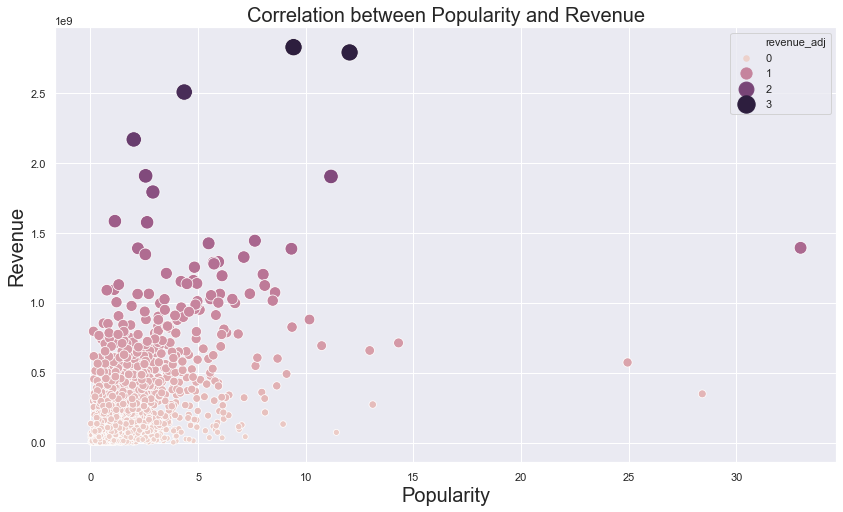

In [211]:
sns.scatterplot(x='popularity', 
                y='revenue_adj',
                data=movie_df_filtered,
                size='revenue_adj',
                hue='revenue_adj',
                sizes=(30, 300))

plt.xlabel('Popularity', fontsize=20)
plt.ylabel('Revenue', fontsize=20)
plt.title('Correlation between Popularity and Revenue', fontsize=20)
plt.show()

> **Conclusions:** No clear pattern is observed regarding the relationship between popularity and revenue, though one may assume that the more popular the movie is, the higher the revenue it generates.

<a id='conclusions'></a>
# Conclusions:

> **Observations:**
1. Christopher Nolan is the most popular director out of all the directors in the dataset.
2. Steven Spielberg is the highest grossing director out of all the directors in the dataset.
3. More movies are released as time goes on.
4. From the heatmap, budget, vote_count, vote_average and popularity are positvely correlated with revenue. However, from the individual pattern, the pattern for voting score vs. revenue is clearer than that of the other three features when plotting against revenue.

> **Limitations:**
1. This dataset contains too many missing values of budget and revenue, that was why I made two dataframes, one with no missing value of budget and revenue so I am able to carry on analysis to answer questions relevant to the budget and revenue of the movies. 
2. Secondly, I did the analysis assuming that the budget and revenue are measured in USD, but that could be wrong in reality.